<a href="https://colab.research.google.com/github/augnit/projects/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import norm, t ,poisson
from scipy.stats import binom, geom ,expon


from scipy.stats import ttest_1samp, ttest_ind, ttest_rel,kstest,kruskal,f_oneway
from scipy.stats import chi2,chisquare,chi2_contingency
from scipy.stats import pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot

#PART1

In [ ]:
# reading file
df=pd.read_csv("/content/Yulu.pdf")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape # 1.shape of data

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


**Note**: That datetime is in object ,converting it to date time

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# seprating date time if nedded
df2=df.copy()
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df2['date'] = [d.date() for d in df2['datetime']]
df2['time'] = [t.time() for t in df2['datetime']]

In [ ]:
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# checking null value
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Note:** There is no null value

 ⚓ checking unique value

In [ ]:
for i in df.columns:
  print(i,":",df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [ ]:
#checking of dataframe columns
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df2.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'new_date', 'new_time'],
      dtype='object')

**value counts**

In [ ]:
# working day
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
# weather
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
#season
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
# counting holiday(yearly_gov)
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
#windspeed
df['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [ ]:
df['humidity'].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

# part 2

In [ ]:
#1.Missing Value & Outlier Detection
#2.Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
#3.Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
#  (Illustrate the insights based on EDA
# Comments on range of attributes, outliers of various attributes
# Comments on the distribution of the variables and relationship between them
# Comments for each univariate and bivariate plots)


⚓ outliers

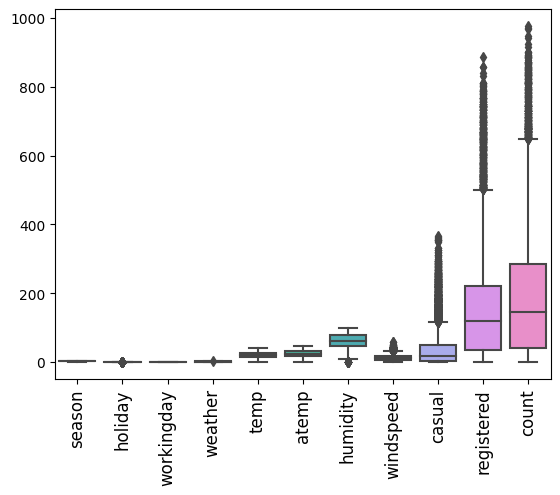

In [ ]:
sns.boxplot(df)
plt.xticks(rotation = 90, fontsize=12)
plt.show()

<Axes: xlabel='weather'>

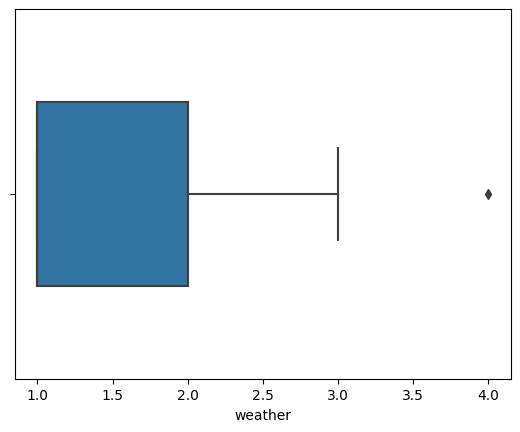

In [ ]:
sns.boxplot(x=df['weather'],width=.5)

<Axes: xlabel='casual'>

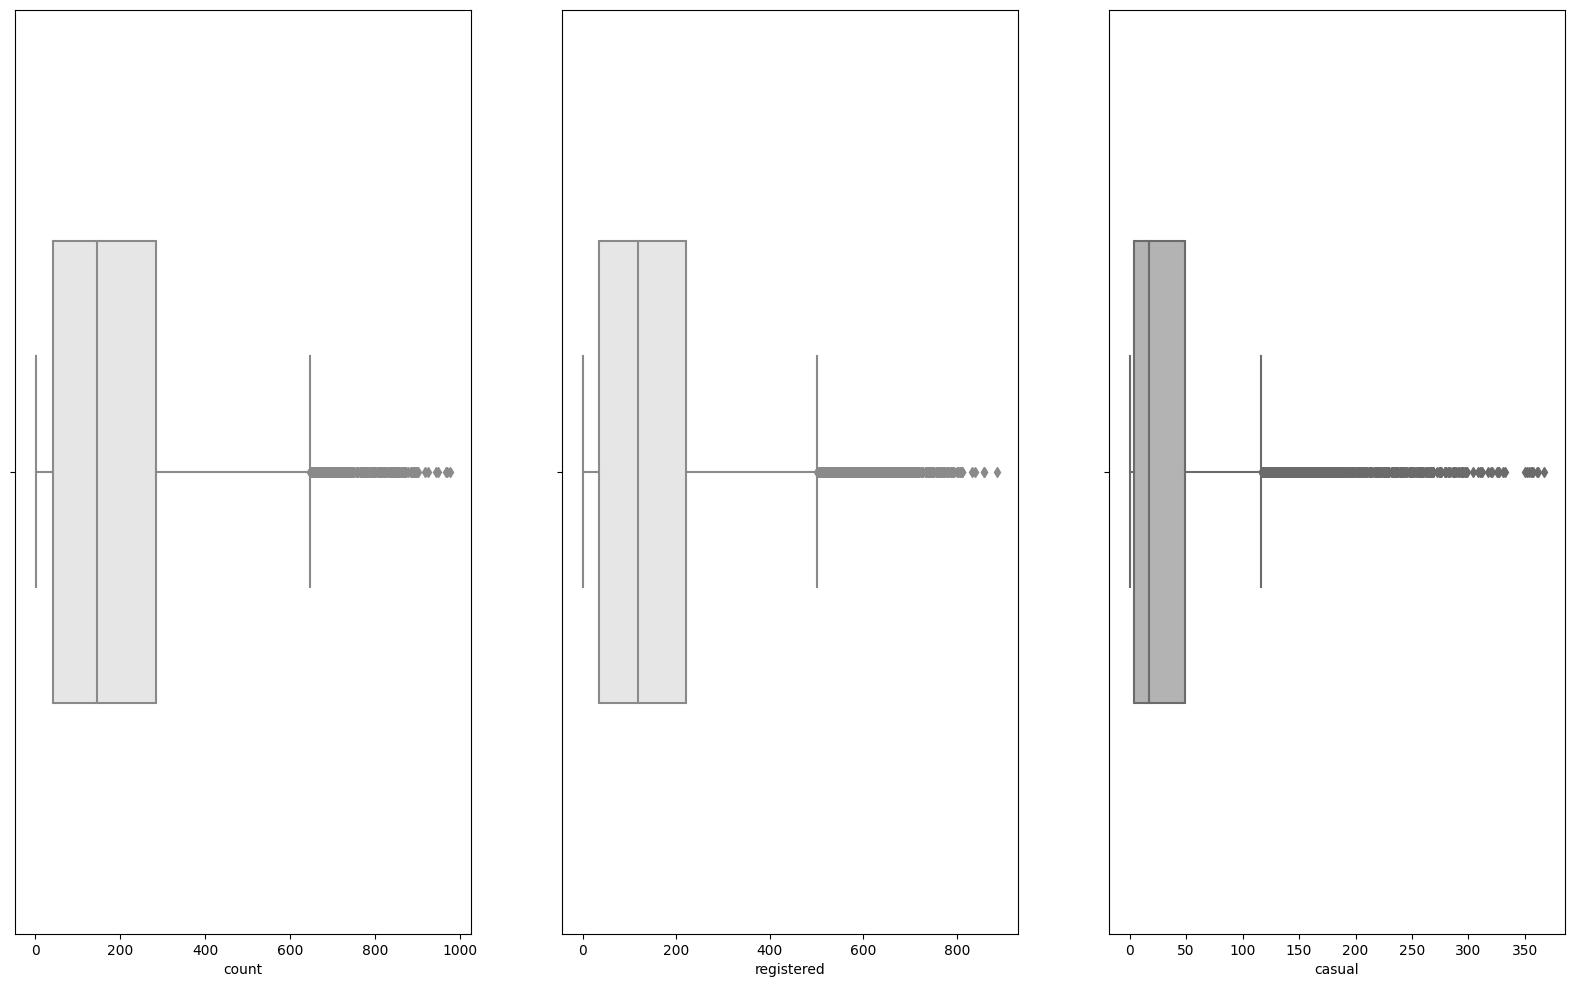

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x=df['count'],width=.5,color=".9")
plt.subplot(1,3,2)
sns.boxplot(x=df['registered'],width=.5,color=".9")
plt.subplot(1,3,3)
sns.boxplot(x=df['casual'],width=.5,color=".7")

In [ ]:
np.percentile(df['count'],25)
np.percentile(df['count'],75)
Iqr=np.percentile(df['count'],75)-np.percentile(df['count'],25)
print(Iqr)
ub=np.percentile(df['count'],75)+(1.5*np.percentile(df['count'],75)-np.percentile(df['count'],25))
print(ub)
np.percentile(df['registered'],25)
np.percentile(df['registered'],75)
Iqr2=np.percentile(df['registered'],75)-np.percentile(df['registered'],25)
print(Iqr2)
ub2=np.percentile(df['registered'],75)+(1.5*np.percentile(df['registered'],75)-np.percentile(df['registered'],25))
print(ub2)
np.percentile(df['casual'],25)
np.percentile(df['casual'],75)
Iqr3=np.percentile(df['casual'],75)-np.percentile(df['casual'],25)
print(Iqr3)
ub3=np.percentile(df['casual'],75)+(1.5*np.percentile(df['casual'],75)-np.percentile(df['casual'],25))
print(ub3)


242.0
668.0
186.0
519.0
45.0
118.5


In [ ]:
print("count_outlier:",df[df['count']>668]['count'].count())
print("registered_outlier:",df[df['registered']>519]['count'].count())
print("casual_outlier:",df[df['casual']>118]['count'].count())

count_outlier: 260
registered_outlier: 379
casual_outlier: 732


In [ ]:
(732/df.shape[0])*100

6.724232959764835

**Insight**: From the understanding of outliers there are


1.   260 outlers in count which is 2.39% of total data
2.   379 outlers in registered which is 3.48% of total data
3.   732 outlers in casual which is 6.72% of total data







<Axes: xlabel='windspeed'>

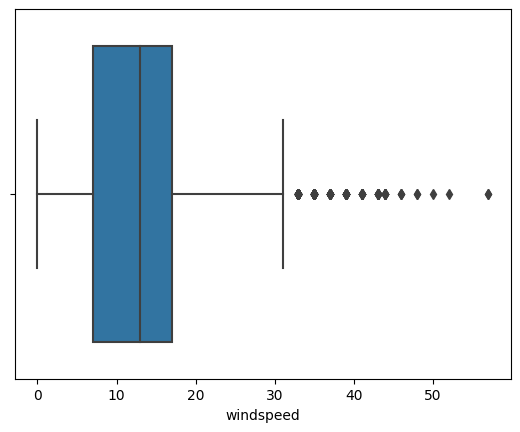

In [ ]:
sns.boxplot(x=df['windspeed'])

In [ ]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<ipython-input-16-e1389961a19d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='gist_earth',annot=True)


<Axes: >

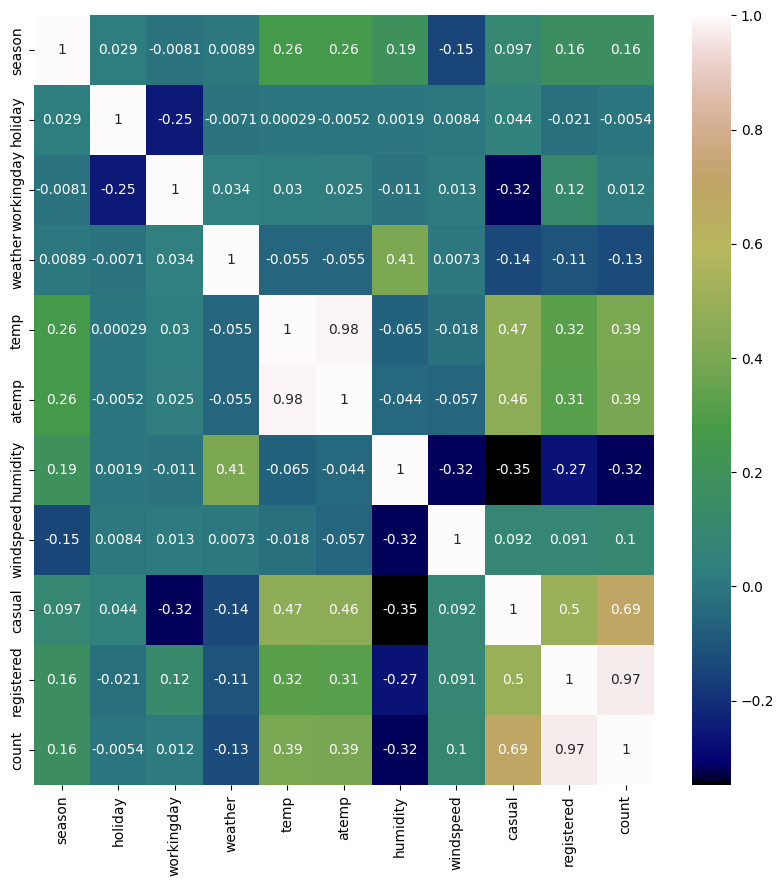

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='gist_earth',annot=True)

**Note:**
1.count is corelated with <registed,casual....>...also (-)ve corellated with <holiday,weather,humidity>

2.registered has (+)colrelated with < count , temp ,
 atemp , casual ...>...also(-)ve corelated with<holiday,weather,humidity>


3.casual has (+)ve corr with<temp,atemp,registered,count>....
also(-)ve corr with <workingday,weather,humidity>

4.temp has(+)ve corr with<season,casual,registration,count..>...
also(-ve) corr with <humidity,windspeed>

5.weather has(-)ve corr with<hiliday,temp,casual,registration,count..>


6.holiday has(+)ve corr with<holiday,casual..>...
also(-ve) corr with <registration,count>

7.season has(+)ve corr with<casual,registration,count..>...
also(-ve) corr with <workingday,windspeed>








In [ ]:
df2['weather'].replace([1,2,3,4],['Clear','Cloudy+','Light Rain+','Heavy Rain'],inplace=True)
df2['season'].replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)

In [ ]:
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1


<Axes: xlabel='weather', ylabel='count'>

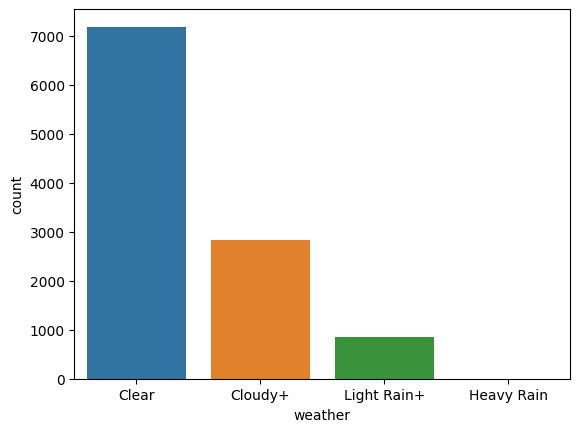

In [ ]:
sns.countplot(data=df2,x='weather')

**Note** : make use of clear weather

<Axes: xlabel='season', ylabel='count'>

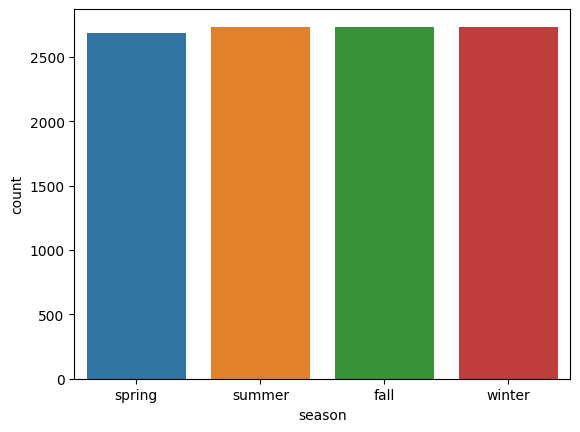

In [ ]:
sns.countplot(data=df2,x='season')

**Note** All season are eually important

<Axes: xlabel='humidity', ylabel='Density'>

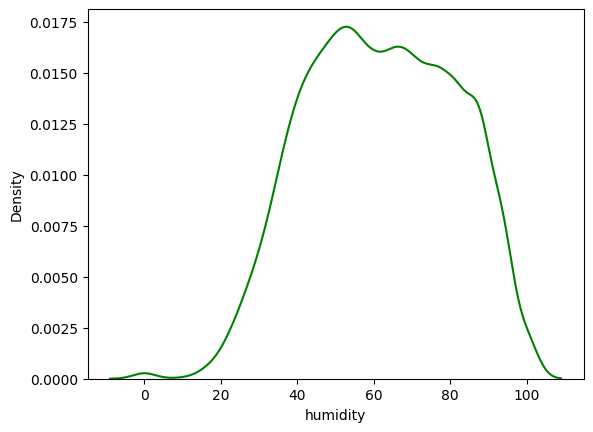

In [ ]:
sns.kdeplot(data=df , x=df['humidity'],color='green')

<Axes: xlabel='temp'>

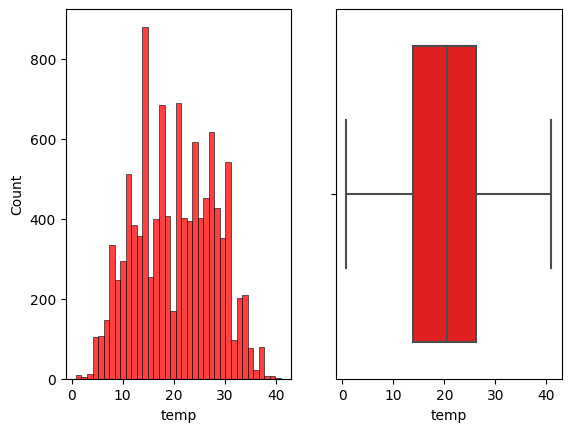

In [ ]:
plt.subplot(121)
sns.histplot(data=df , x=df['temp'],color='r')
plt.subplot(122)
sns.boxplot(x=df['temp'],color='r')

In [ ]:
print(df['temp'].mean())
print(np.percentile(df['temp'],75))
print(np.percentile(df['temp'],25))

20.23085981995223
26.24
13.94


▶**Note**so 50% of temp lie between 26.24 and 13.94

**Date and Time**

(array([14975., 15065., 15156., 15248., 15340., 15431., 15522., 15614.,
        15706.]),
 [Text(14975.0, 0, '2011-01'),
  Text(15065.0, 0, '2011-04'),
  Text(15156.0, 0, '2011-07'),
  Text(15248.0, 0, '2011-10'),
  Text(15340.0, 0, '2012-01'),
  Text(15431.0, 0, '2012-04'),
  Text(15522.0, 0, '2012-07'),
  Text(15614.0, 0, '2012-10'),
  Text(15706.0, 0, '2013-01')])

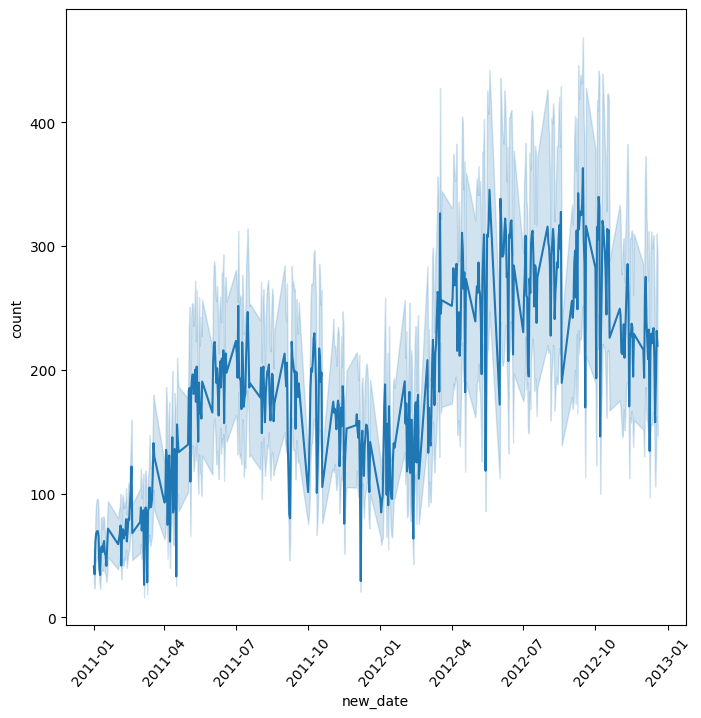

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x=df2['new_date'],y=df['count'])
plt.xticks(rotation=50)

In [ ]:
a=df2['time'].value_counts()
a

12:00:00    456
13:00:00    456
22:00:00    456
21:00:00    456
20:00:00    456
19:00:00    456
18:00:00    456
17:00:00    456
16:00:00    456
15:00:00    456
14:00:00    456
23:00:00    456
11:00:00    455
10:00:00    455
09:00:00    455
08:00:00    455
07:00:00    455
06:00:00    455
00:00:00    455
01:00:00    454
05:00:00    452
02:00:00    448
04:00:00    442
03:00:00    433
Name: time, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

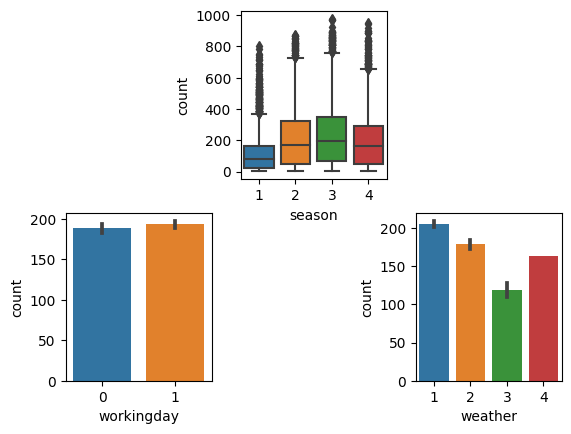

In [ ]:
#workday and count, season and count, weather and count
plt.subplot(2,3,4)
sns.barplot(data=df,x='workingday',y='count')
plt.subplot(2,3,2)
sns.boxplot(data=df,x='season',y='count')
plt.subplot(2,3,6)
sns.barplot(data=df,x='weather',y='count')

Observation:


1.   There are 732 outlers in casual which is 6.72% of total data
so need to make sure to have more employees in this days so that customer need not to wait after booking online....
2.   we need to make use of clear and cloudy days to make more or retain our customer...
3.   also need to make sure that even in light rainy days to provide good service so that customer has posive view...
4.Take all season equally important  
5.50% of temp lie between 26.24 and 13.94 which is ideal for cycle so make sure there are no que or waiting period






#Part3

In [ ]:
# Visual analysis (1)
# Hypothesis formulation (1)
# Select the appropriate test (1)
# Check test assumptions (2)
# Find the p-value(1)
# Conclusion based on the p-value (2)

In [ ]:
#1.T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)

**working vs holiday**

In [ ]:
# checking working day cal and count col
df[['workingday','count']]

,workingday,count
0,0,16
1,0,40
2,0,32
3,0,13
4,0,1
...,...,...
10881,1,336
10882,1,241
10883,1,168
10884,1,129


In [ ]:
df[['workingday','count']].describe()

,workingday,count
count,10886.000000,10886.000000
mean,0.680875,191.574132
std,0.466159,181.144454
min,0.000000,1.000000
25%,0.000000,42.000000
50%,1.000000,145.000000
75%,1.000000,284.000000
max,1.000000,977.000000


<Axes: title={'center': 'Graph1 of Working day'}, xlabel='count', ylabel='Count'>

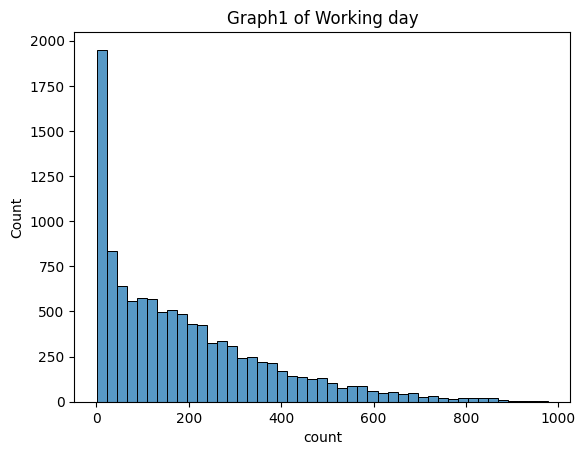

In [ ]:
# checking distribution of count
plt.title("Graph1 of Working day")
sns.histplot(data=df,x='count')

<ipython-input-34-c5635129cccf>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='count',hue='workingday',shade=True)


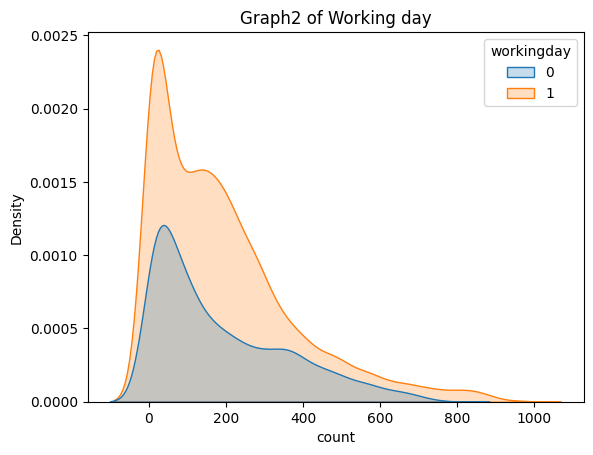

In [ ]:
#checking graph wrt. working day
plt.title("Graph2 of Working day")
sns.kdeplot(data=df,x='count',hue='workingday',shade=True)
plt.show()

In [ ]:
# checking equal varience
Ho='varience same'
Ha='varience are different'
working = df[df['workingday']==1]['count']
holiday = df[df['workingday']==0]['count']
stst,p_value=c(holiday,working)
print(p_value)
if p_value<0.05:
  print('reject')
  print(Ha)
else:
  print('fail to reject')
  print(Ho)



0.9437823280916695
fail to reject
varience same


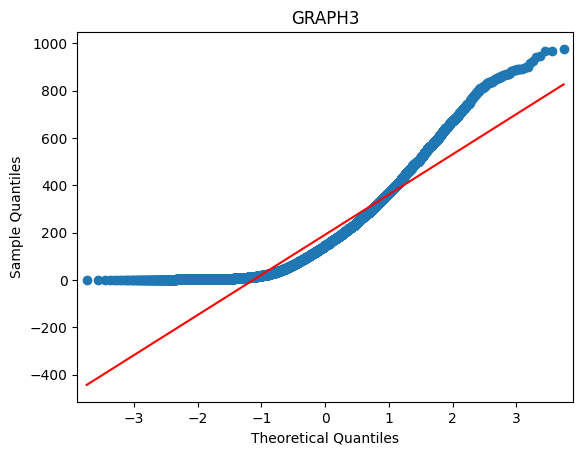

In [ ]:
# checking of normality
# qqplot
#Shapiro-Wilkins Test

qqplot(df['count'],line="r",marker='o')
plt.title('GRAPH3')
plt.show()

In [ ]:
#Shapiro-Wilkins Test
Ho="normal diatribution"
Ha="not a normal distribution"
x=df['count']
shapiro(x)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)

**OBSERVATION**: P_VALUE<ALPHA THUS WE reject Ho

In [ ]:
# T-test
#Working Day has an effect on the number of electric cycles rented
Ho='No effect of working vs holiday'
Ha='no of rented is more on working day'
working = df[df['workingday']==1]['count']
holiday = df[df['workingday']==0]['count']
stat,p_value=ttest_ind(working,holiday,alternative="greater")
print("p_value : ",p_value)
# let take confidence level 90%
alpha=0.1
if p_value<alpha:
  print('reject Ho')
  print(Ha)
else:
  print('fail to reject Ho')
  print(Ho)


p_value :  0.11322402113180674
fail to reject Ho
No effect of working vs holiday


KstestResult(statistic=0.1217989091162518, pvalue=3.395199032884015e-141, statistic_location=0.1464857321934856, statistic_sign=-1)

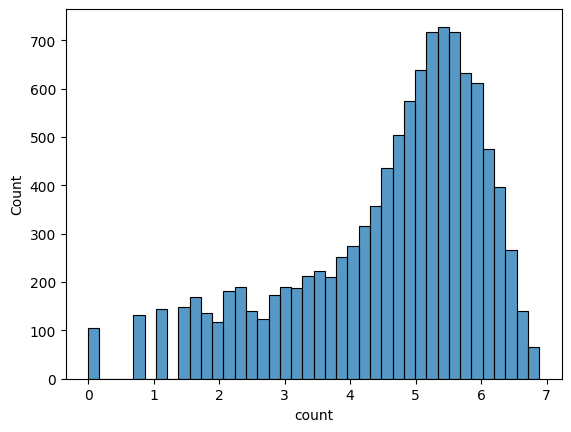

In [ ]:
#extra
# as graph 1 of workind day is right skewed
#kstest
Ho="normal dist"
Ha='not a normal dist'
log_c=np.log(df["count"])
sns.histplot(log_c)
z_c = (log_c-log_c.mean())/log_c.std()
kstest(z_c,norm.cdf)


**weather,season vs rental**

In [ ]:
#2.ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
# ckecking col of weather,season,count
df3=df[['weather','season','count']].copy()
df3

,weather,season,count
0,1,1,16
1,1,1,40
2,1,1,32
3,1,1,13
4,1,1,1
...,...,...,...
10881,1,4,336
10882,1,4,241
10883,1,4,168
10884,1,4,129


In [ ]:
# replacing
df3['weather'].replace([1,2,3,4],['Clear','Cloudy+','Light Rain+','Heavy Rain'],inplace=True)
df3['season'].replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)
#(1: spring, 2: summer, 3: fall, 4: winter)

Text(0.5, 1.0, 'Graph6')

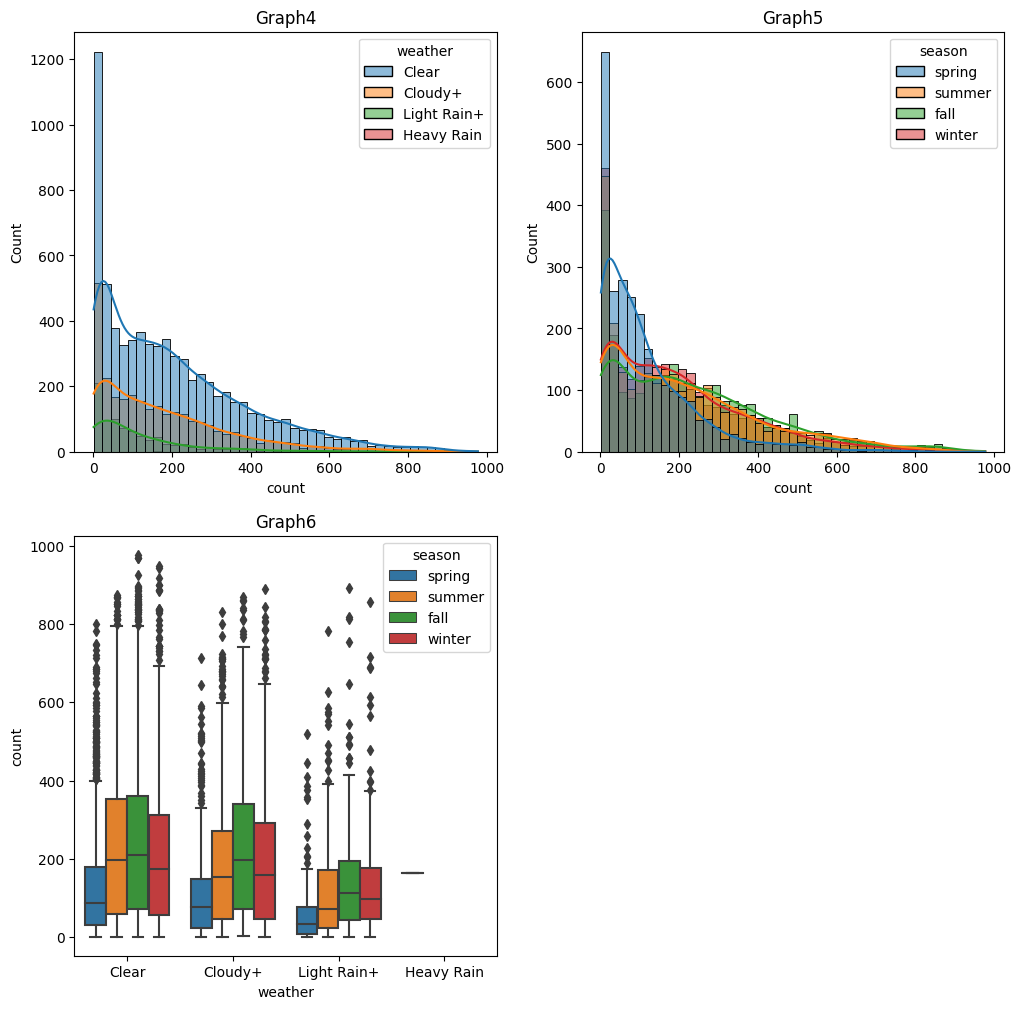

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.histplot(data=df3,x='count',hue='weather',kde=True)
plt.title('Graph4')
plt.subplot(2,2,2)
sns.histplot(data=df3,x='count',hue='season',kde=True)
plt.title('Graph5')
plt.subplot(2,2,3)
sns.boxplot(data=df3,y='count',x='weather',hue='season')
plt.title('Graph6')

**prerequire test for anova**

In [ ]:
#1.equal varience
ho='varirnce is same'
ha='varience is diff'
w_Clear= df3[df3['weather']=='Clear']['count']
w_Cloudy= df3[df3['weather']=='Cloudy+']['count']
w_Light_Rain= df3[df3['weather']=='Light Rain+']['count']
w_Heavy_Rain= df3[df3['weather']=='Heavy Rain']['count']
levene(w_Clear,w_Cloudy,w_Light_Rain,w_Heavy_Rain)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

In [ ]:
ho='varirnce is same'
ha='varience is diff'
s_spring= df3[df3['season']=='spring']['count']
s_summer= df3[df3['season']=='summer']['count']
s_fall= df3[df3['season']=='fall']['count']
s_winter= df3[df3['season']=='winter']['count']
levene(s_spring,s_summer,s_fall,s_winter)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

<Figure size 400x400 with 0 Axes>

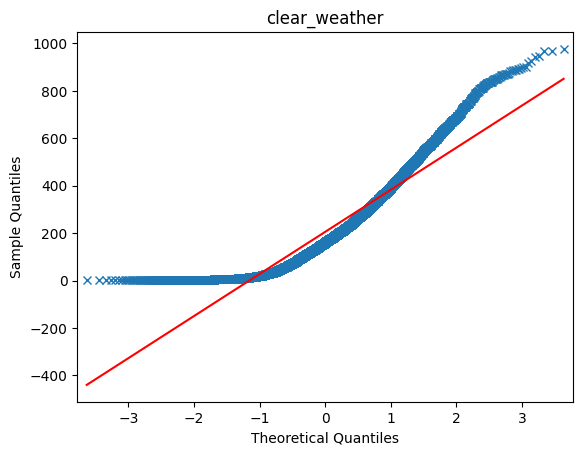

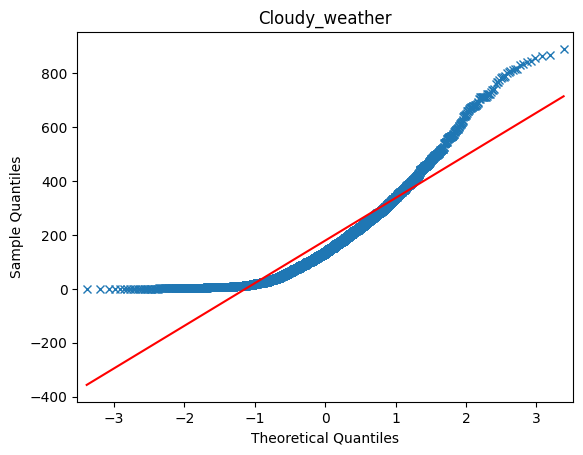

In [ ]:
#2.normality
#QQplot test for all weather
#shapiro test
plt.figure(figsize=(4,4))

qqplot(w_Clear,line="r",marker='x')
plt.title('clear_weather')
plt.show()

qqplot(w_Cloudy,line="r",marker='x')
plt.title('Cloudy_weather')
plt.show()



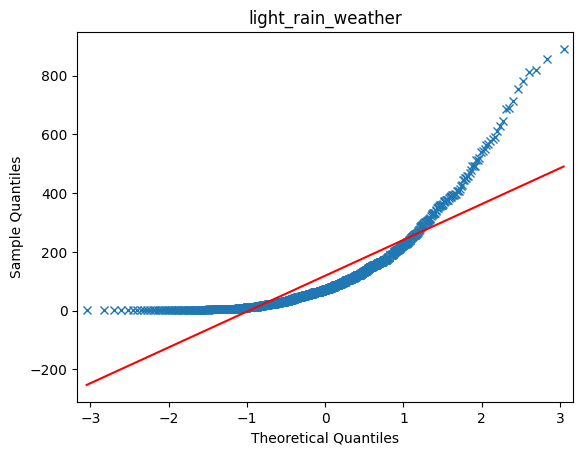

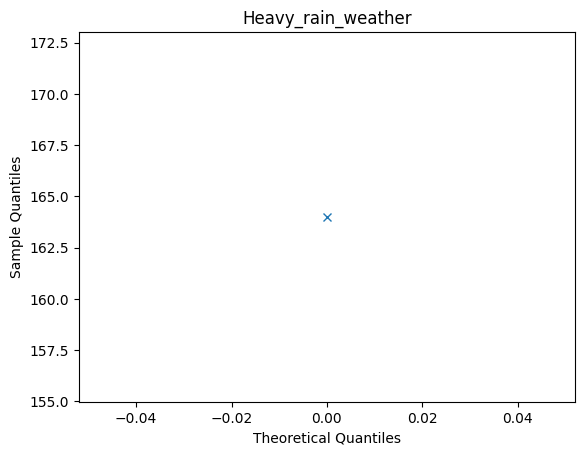

In [ ]:
qqplot(w_Light_Rain,line="r",marker='x')
plt.title('light_rain_weather')
plt.show()

qqplot(w_Heavy_Rain,line="r",marker='x')
plt.title('Heavy_rain_weather')
plt.show()

In [ ]:
# shapiro test for all season to check normality
print(shapiro(s_spring))
print(shapiro(s_summer))
print(shapiro(s_fall))
print(shapiro(s_winter))

ShapiroResult(statistic=0.8087388873100281, pvalue=0.0)
ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39)
ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36)
ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)


**annova/
kruskal**

In [ ]:
# checking annova test for season
Ho="seoson has no effect"
Ha="season has effect on renting cycle"
s,p=f_oneway(s_spring,s_fall,s_summer,s_winter)
print(f)
if p<0.05:
  print('reject')
  print(Ha)
else:
  print('fail to reject')
  print(Ho)

5.482069475935669e-42
reject
season has effect on renting cycle


In [ ]:
# since we observed that it is not a normal distribution
Ho="seoson has no effect"
Ha="season has effect on renting cycle"
s,f=kruskal(s_spring,s_fall,s_summer,s_winter)
print(f)
if p<0.05:
  print('reject')
  print(Ha)
else:
  print('fail to reject')
  print(Ho)

2.479008372608633e-151
reject
season has effect on renting cycle


In [ ]:
# checking annova test for weather
Ho="weather has no effect"
Ha="weather has effect on renting cycle"
s,f=f_oneway(w_Clear,w_Cloudy,w_Heavy_Rain,w_Light_Rain)
print(f)
if p<0.05:
  print('reject')
  print(Ha)
else:
  print('fail to reject')
  print(Ho)


5.482069475935669e-42
reject
weather has effect on renting cycle


In [ ]:
# since we observed that it is not a normal distribution
Ho="seoson has no effect"
Ha="season has effect on renting cycle"
s,f=kruskal(w_Clear,w_Cloudy,w_Heavy_Rain,w_Light_Rain)
print(f)
if p<0.05:
  print('reject')
  print(Ha)
else:
  print('fail to reject')
  print(Ho)


3.501611300708679e-44
reject
season has effect on renting cycle


**weather vs season**

In [ ]:
# 3.Chi-square test to check if Weather is dependent on the season (10 points)

In [ ]:
#checking col
w_s=df3[['weather','season']]
w_s

,weather,season
0,Clear,spring
1,Clear,spring
2,Clear,spring
3,Clear,spring
4,Clear,spring
...,...,...
10881,Clear,winter
10882,Clear,winter
10883,Clear,winter
10884,Clear,winter


In [ ]:
# checking some relation
weather_season=pd.crosstab(index=df3['weather'],columns=df3['season'],margins=True)
weather_season

season,fall,spring,summer,winter,All
weather,,,,,
Clear,1930,1759,1801,1702,7192
Cloudy+,604,715,708,807,2834
Heavy Rain,0,1,0,0,1
Light Rain+,199,211,224,225,859
All,2733,2686,2733,2734,10886


<Axes: xlabel='season', ylabel='count'>

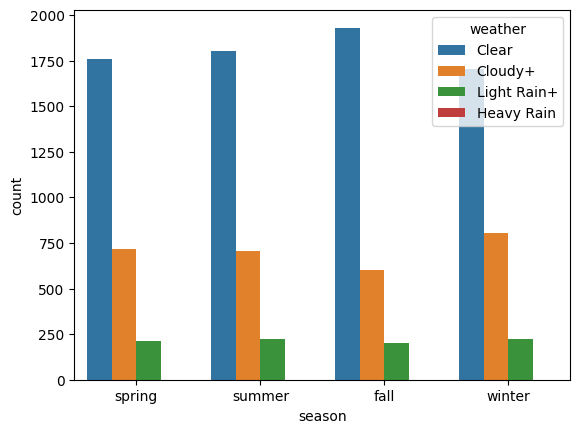

In [ ]:
sns.countplot(data=w_s,x='season',hue='weather')

In [ ]:
Ho='There is dependency'
Ha="There was no dependency between seasion and weather"
s,p_value,df,exf=chi2_contingency(weather_season)
print(p_value)
if p_value<0.05:
  print('reject Ho')
  print(Ha)
else:
  print('fail to reject Ho')
  print(Ho)

3.1185273325126814e-05
reject Ho
There was no dependency between seasion and weather


#INSIGHT
**working vs holiday**

1.   IN WORKING vs HOLIDAY obove we observed that it was right skewed
type of Distribution
2.   IN GRAPH2 we observed the distribution and with levene test
      p_value=0.9437823280916695
      fail to reject
      Thus:varience same
3.   In graph3 we observed that given count distribution is not normal distribution,which we backed by shapiro Test ShapiroResult(statistic=0.8783695697784424, pvalue=0.0)
where p_value<0.05 thus we reject Ho

4.   with Ttest we observed that p_value :  0.11322402113180674
fail to reject Ho ,Thus:No effect of working vs holiday

---



**weather,season vs rental**


1.  From graph 4 and 5 we observed the distribution
2.  on checking the prerequired for annova
    LeveneResult for **weather**(statistic=54.85106195954556,
    pvalue=3.504937946833238e-35)||LeveneResult for **season**(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)
    -->since in both we fail to reject the NUll hypothesis (varience are different)
3.   on observing the QQplot also from kstest we observed that it is not normal distribution
4.  For season  
F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149),
KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)
5.  For weather
F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42),
KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

---









****

**weather vs season**
p_value=3.1185273325126814e-05/
reject Ho/
There was no dependency between seasion and weather

**Observation**

*   since there is no difference on renting Yulu cycle,we companey should make sure  that their is enough staff avilable even on holidays(gov holiday also)

*   From f_test/kruskal test it was clear that weather has significan effect on renting cycle mostly weather like clear,cloudy so we must acquried most customer in this days...also
it is important to have proper weather report so that we can follow it accordingly
*   Also we observed that their is no dependency between season and weather so each season is equally important and their are equal chances to acquire more customer



